# Trees

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
sklearn.set_config(print_changed_only=True)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
display(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# tree visualization

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(465.0, 503.3333333333333, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(232.5, 302.0, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(116.25, 100.66666666666663, 'gini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(348.75, 100.66666666666663, 'gini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(697.5, 302.0, 'worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(581.25, 100.66666666666663, 'gini = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(813.75, 100.66666666666663, 'gini = 0.03\nsamples = 130\nvalue = [128, 2]')]

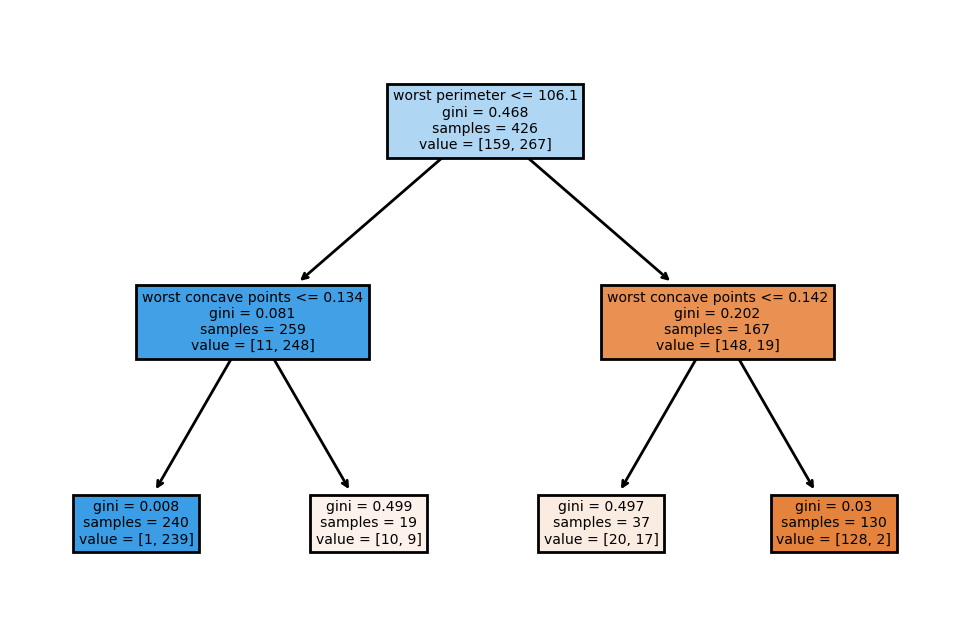

In [6]:
plt.figure(dpi=200)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

# Parameter Tuning

[Text(391.375, 249.15, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(139.5, 203.85000000000002, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(62.0, 158.55, 'area error <= 48.975\ngini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(31.0, 113.25, 'gini = 0.0\nsamples = 239\nvalue = [0, 239]'),
 Text(93.0, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(217.0, 158.55, 'worst texture <= 26.0\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(155.0, 113.25, 'worst smoothness <= 0.179\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(124.0, 67.94999999999999, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(186.0, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(279.0, 113.25, 'worst compactness <= 0.263\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(248.0, 67.94999999999999, 'area error <= 26.15\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(217.0, 22.64999999999997

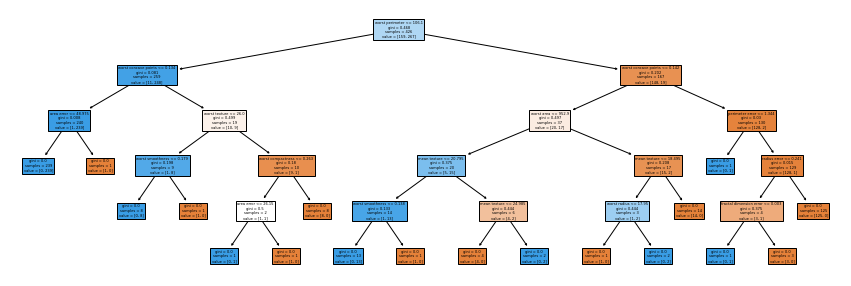

In [7]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
plt.figure(figsize=(15, 5))
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

[Text(418.5, 237.82500000000002, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(209.25, 169.875, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(104.625, 101.92500000000001, 'area error <= 48.975\ngini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(52.3125, 33.974999999999994, 'gini = 0.0\nsamples = 239\nvalue = [0, 239]'),
 Text(156.9375, 33.974999999999994, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(313.875, 101.92500000000001, 'worst texture <= 26.0\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(261.5625, 33.974999999999994, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(366.1875, 33.974999999999994, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(627.75, 169.875, 'worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(523.125, 101.92500000000001, 'worst radius <= 17.615\ngini = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(470.8125, 33.974999999999

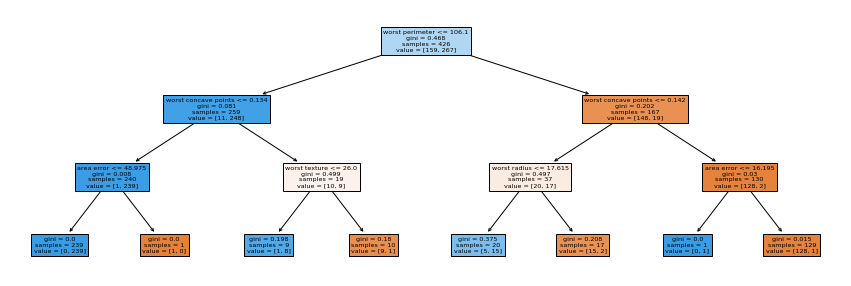

In [8]:
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
plt.figure(figsize=(15, 5))
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

In [ ]:
tree = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

In [ ]:
tree = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

In [ ]:
tree = DecisionTreeClassifier(min_impurity_decrease=.01).fit(X_train, y_train)
plot_tree(tree, feature_names=cancer.feature_names, filled=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

In [9]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid,
                    cv=StratifiedShuffleSplit(100), return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=None, test_size=None,
            train_size=None),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 7)}, return_train_score=True)

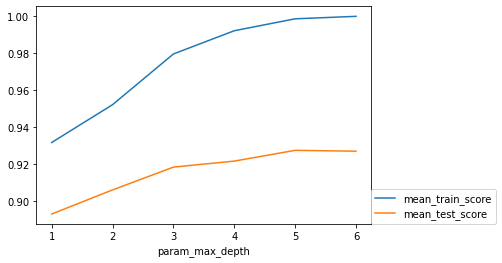

In [10]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

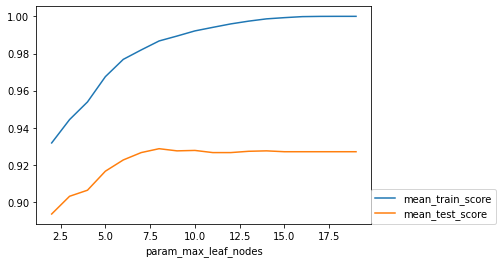

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes': range(2, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid,
                    cv=StratifiedShuffleSplit(100, random_state=1),
                   return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

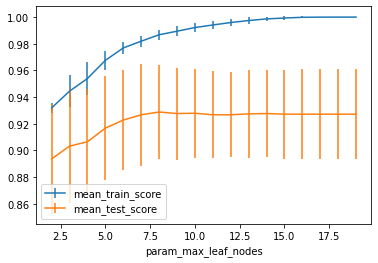

In [12]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [13]:
grid.best_params_

{'max_leaf_nodes': 8}

[Text(167.40000000000003, 199.32, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(66.96000000000001, 163.07999999999998, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(33.480000000000004, 126.83999999999999, 'gini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(100.44000000000001, 126.83999999999999, 'worst texture <= 26.0\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(66.96000000000001, 90.6, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(133.92000000000002, 90.6, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(267.84000000000003, 163.07999999999998, 'worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(234.36, 126.83999999999999, 'worst area <= 952.9\ngini = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(200.88000000000002, 90.6, 'mean texture <= 20.795\ngini = 0.375\nsamples = 20\nvalue = [5, 15]'),
 Text(167.40000000000003, 54.359999999999985, 'gini = 0.1

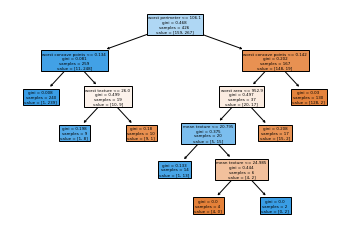

In [14]:
plot_tree(grid.best_estimator_, feature_names=cancer.feature_names, filled=True)

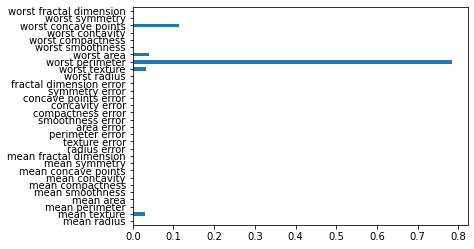

In [15]:
pd.Series(grid.best_estimator_.feature_importances_,
          index=cancer.feature_names).plot(kind="barh")

# Exercise
Apply a decision tree to the "adult" dataset and visualize it.

Tune parameters with grid-search; try at least max_leaf_nodes and max_depth, but separately.

Visualize the resulting tree and it's feature importances.

In [19]:
import pandas as pd
data = pd.read_csv("data/adult.csv", index_col=0)
income = data.income
data_features = data.drop("income", axis=1)

display(data_features.head())


### one hot encode data
data_one_hot = pd.get_dummies(data_features)
data_one_hot.head()


### Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_one_hot, income)



,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes': range(2, 20),'max_depth':range(1,7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid,
                    cv=StratifiedShuffleSplit(100, random_state=1),
                   return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))



KeyboardInterrupt: 

In [ ]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))



In [ ]:
scores = pd.DataFrame(grid.cv_results_)
display(scores)


In [ ]:
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca())
grid.best_params_

In [ ]:
plot_tree(grid.best_estimator_, feature_names=X_, filled=True)

In [ ]:
pd.Series(grid.best_estimator_.feature_importances_).plot(kind="barh")

"Index(['age', 'education-num', 'capital-gain', 'capital-loss',\n       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',\n       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',\n       ...\n       'native-country_ Portugal', 'native-country_ Puerto-Rico',\n       'native-country_ Scotland', 'native-country_ South',\n       'native-country_ Taiwan', 'native-country_ Thailand',\n       'native-country_ Trinadad&Tobago', 'native-country_ United-States',\n       'native-country_ Vietnam', 'native-country_ Yugoslavia'],\n      dtype='object', length=107)"